# Exercício 4

>4) Remova as stopwords dos tweets usando a biblioteca NLTK (Dica: reuse o código do TP3). Refaça o experimento usando a melhor configuração de BoW e algoritmo de classificação. Discuta os resultados encontrados.

In [25]:
import re
import string

import nltk
import pandas as pd
from unidecode import unidecode
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [2]:
dataset = pd.read_csv(r'/home/tulio/Documents/UFU/ORI/Tweets_Mg.csv')

In [3]:
dataset.describe()

,Unnamed: 0,Geo Coordinates.latitude,Geo Coordinates.longitude,Retweet Count,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
count,8199.000000,104.000000,104.000000,8199.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4099.000000,-42.964716,-19.530204,43.338212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2366.991762,1.399314,1.037815,123.369519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,-46.643035,-23.493237,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2049.500000,-43.941907,-19.914265,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4099.000000,-41.971876,-18.879871,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6148.500000,-41.943662,-18.859150,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,8198.000000,-41.560230,-18.568089,1940.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.count()

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [5]:
dataset['Classificacao'].value_counts()

Positivo    3300
Neutro      2453
Negativo    2446
Name: Classificacao, dtype: int64

In [6]:
tweets, sentimentos = dataset['Text'], dataset['Classificacao']

In [28]:
def remover_stopwords(text):
    stopwords = nltk.corpus.stopwords.words('portuguese')
    words = text.split()
    formatted_words = [unidecode(word).lower().translate(str.maketrans('', '', string.punctuation + "\n")) for word in words]
    words_wo_stopwords = [word for word in formatted_words if word.lower() not in stopwords]
    return ' '.join(words_wo_stopwords)

In [29]:
remover_stopwords('É um beluga, coisa imunda!')

'beluga coisa imunda'

In [30]:
tweets_sem_stopwords = tweets.apply(remover_stopwords)

In [31]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,2))
freq_tweets = vectorizer.fit_transform(tweets_sem_stopwords)

In [32]:
model = MultinomialNB()
model.fit(freq_tweets, sentimentos)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
testes = ['O governo de Minas é uma tragédia, muito ruim','Estou muito feliz com o governo de Minas esse ano','O estado de Minas Gerais decretou calamidade financeira!!!','A segurança do estado está deixando a desejar','O governador de Minas é do Novo']
print(testes)

['O governo de Minas é uma tragédia, muito ruim', 'Estou muito feliz com o governo de Minas esse ano', 'O estado de Minas Gerais decretou calamidade financeira!!!', 'A segurança do estado está deixando a desejar', 'O governador de Minas é do Novo']


In [35]:
freq_testes = vectorizer.transform(testes)

In [36]:
model.predict(freq_testes)

array(['Negativo', 'Neutro', 'Negativo', 'Neutro', 'Positivo'],
      dtype='<U8')

In [38]:
resultados = cross_val_predict(model,freq_tweets,sentimentos,cv=10)

In [40]:
metrics.accuracy_score(sentimentos, resultados)

0.8923039395048177

In [41]:
print(metrics.classification_report(sentimentos, resultados))

              precision    recall  f1-score   support

    Negativo       0.90      0.93      0.91      2446
      Neutro       0.80      0.89      0.84      2453
    Positivo       0.98      0.86      0.92      3300

    accuracy                           0.89      8199
   macro avg       0.89      0.90      0.89      8199
weighted avg       0.90      0.89      0.89      8199



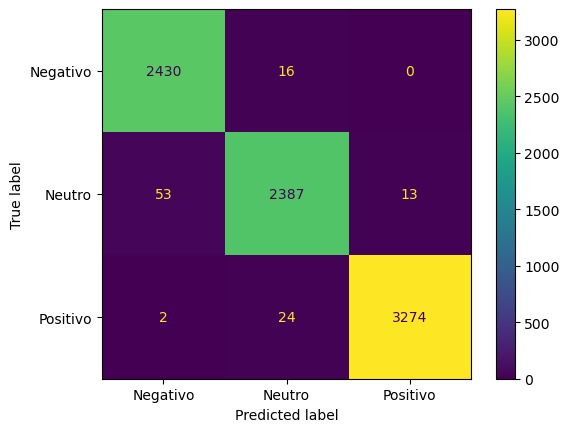

In [43]:
confusion_matrix = metrics.plot_confusion_matrix(model,X=freq_tweets,y_true=sentimentos,values_format='.4g')